# Lecture 28

## A demo lecture to wrap things up.

## Complex eigenvalues

In [40]:
A = [0, 1; -1,0]
eig(A)


A =

     0     1
    -1     0


ans =

   0.0000 + 1.0000i
   0.0000 - 1.0000i



In [41]:
[V,D] = eig(A)


V =

   0.7071 + 0.0000i   0.7071 + 0.0000i
   0.0000 + 0.7071i   0.0000 - 0.7071i


D =

   0.0000 + 1.0000i   0.0000 + 0.0000i
   0.0000 + 0.0000i   0.0000 - 1.0000i



In [45]:
A*V(:,1) - D(1,1)*V(:,1)


ans =

     0
     0



In [46]:
A*V(:,2) - D(2,2)*V(:,2)


ans =

     0
     0



## Gershgorin Circle Theorem

Let $A$ be an $n\times n$ matrix and let $D_i$ denote the circle in the complex plane $\mathbb C$ with center $a_{ii}$ and radius $\sum_{j\neq i} |a_{ij}|$:

$$D_i = \left\{ z \in \mathbb C : |z-a_{ii}| \leq \sum_{j \neq i} |a_{ij}| \right\}.$$

Then all of the eigenvalues of $A$ are contained in the union $D_A = \bigcup_i D_i$.


A =

    4.0000    0.1000    1.0000
         0    0.2000    1.0000
   -0.1000         0    9.0000



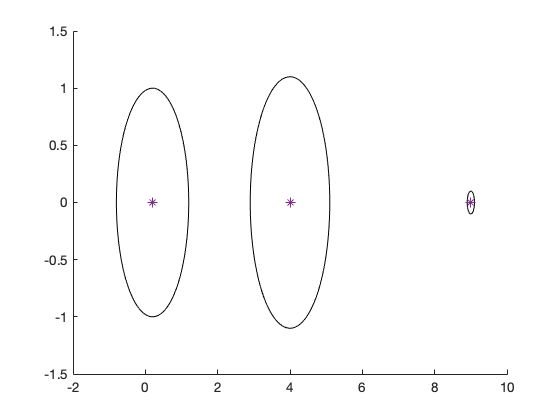

In [61]:
hold on
%A = [10 2 3 1; 1 -3 1 -1; -1 -3 -1 4; 2 2 2 5]
%A = rand(10)-1/2; A = A + 1j*(rand(10)-1/2);
A = [4,.1,1;0,.2,1;-.1,0,9]
for i = 1:length(A)
    a = A(i,i); r = norm(A(i,:),1)-abs(a);
    theta = linspace(0,2*pi,100);
    x = r*cos(theta); y = r*sin(theta);
    plot(x+real(a),y + imag(a),'k')
end
lambda = eig(A);
plot(real(lambda),imag(lambda),'*')

## Spectral factorization


In [62]:
A = [1, 3; 4, 1]; % a non-symmetric matrix
[V,D] = eig(A)


V =

    0.6547   -0.6547
    0.7559    0.7559


D =

    4.4641         0
         0   -2.4641



In [63]:
V*D*inv(V)


ans =

    1.0000    3.0000
    4.0000    1.0000



In [67]:
A = [1, 3; 3, 1]; % a symmetric matrix
[V,D] = eig(A)


V =

   -0.7071    0.7071
    0.7071    0.7071


D =

    -2     0
     0     4



In [68]:
V*D*inv(V)


ans =

     1     3
     3     1



In [71]:
V'*V


ans =

    1.0000         0
         0    1.0000



In [72]:
V*D*V' % V' = inv(V) because A is symmetric


ans =

    1.0000    3.0000
    3.0000    1.0000



Not every matrix has such a factorization:

In [65]:
A = [1, 1; 0, 1] % a non-symmetric matrix
[V,D] = eig(A)


A =

     1     1
     0     1


V =

    1.0000   -1.0000
         0    0.0000


D =

     1     0
     0     1



In [66]:
V*D*inv(V)



ans =

     1     0
     0     1



## QR eigenvalue algorithm

In [90]:
format long
A = [1, 3; 3, 1];
for i = 1:80
    [Q,R] = qr(A);
    A = R*Q;
end

In [91]:
A


A =

   3.999999999999999   0.000000000000001
   0.000000000000000  -2.000000000000000



In [92]:
eig(A)


ans =

   3.999999999999999
  -2.000000000000000



In [101]:
A = [1, 3, 1; 3, 0, -1; 1,  -1, 1]
for i = 1:100
    [Q,R] = qr(A);
    A = R*Q;
end
A


A =

     1     3     1
     3     0    -1
     1    -1     1


A =

   3.547506613164868   0.000000851961181   0.000000000000000
   0.000000851961184  -3.034041835803387   0.000000000000000
   0.000000000000000  -0.000000000000000   1.486535222638515



In [102]:
eig(A)


ans =

   3.547506613164979
  -3.034041835803497
   1.486535222638515



## Singular values

In [104]:
A = randn(20,10);
[U,S,V] = svd(A);

In [105]:
norm(U*S*V' - A)


ans =

     1.040978413993062e-14



## Condition number

Consider the matrix from CP5:

In [106]:
r = RandStream('mt19937ar','Seed',1234);
A = r.randn(6,10);
At = [1e-8*eye(10); A];

Then, let's choose $\vec b$ so that we know the exact solution:

In [107]:
x_true = ones(10,1);
bt = At*x_true;

In [108]:
[LU,P] = GEpp(At'*At);
x = applyP(P,At'*bt);
x = Forsub([LU,x]);
x = Backsub([LU,x])


x =

   0.415706332160811
  14.396301413488539
  -3.576282694993858
   3.857307186801808
  10.322835462601677
   3.727905381056560
  -3.093970265070035
  24.089694077103999
 -10.733275390162861
 -11.706397203879543



If our solution is fully accurate, we'd espect this relative error to be about $2 \times 10^{-16}$:

In [109]:
norm(x-x_true)/norm(x_true)


ans =

  10.734441920919741



In [110]:
x


x =

   0.415706332160811
  14.396301413488539
  -3.576282694993858
   3.857307186801808
  10.322835462601677
   3.727905381056560
  -3.093970265070035
  24.089694077103999
 -10.733275390162861
 -11.706397203879543



In [111]:
x_true


x_true =

     1
     1
     1
     1
     1
     1
     1
     1
     1
     1



We have lost all 16 digits.  This is indeed predicted by the condition number:

In [112]:
cond(At'*At)


ans =

     3.250311517748273e+17



The expected error is approximately

In [114]:
cond(At'*At)*2e-16


ans =

  65.006230354965453



If we use Householder QR we only encounter `At` which has a much smaller condition number:

In [115]:
cond(At)
n = size(At,2);
[~,R] = House([At,bt]);
x = Backsub(R(1:n,1:n+1));
norm(x-x_true)/norm(x_true)


ans =

     5.040901161460820e+08


ans =

     3.559802987994078e-08



We've lost approximately 8 digits, also predicted closely by the condition number.

We can then see what MATLAB does.  It seems to do a little better, but not by much.  I believe it incorporates pivoting in the QR algorithm which helps a little (in this case).

In [116]:
x = At\bt;
norm(x-x_true)/norm(x_true)


ans =

     1.235108044623968e-08



## Using the SVD for image compression

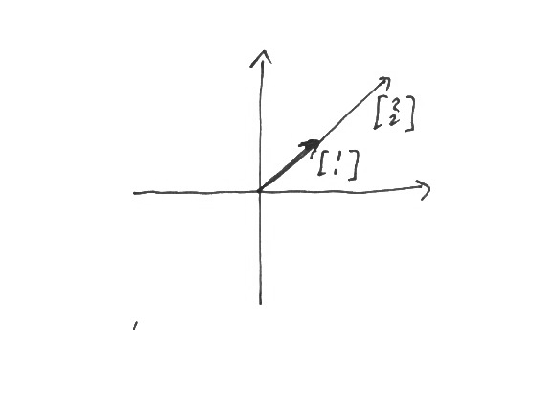

In [117]:
A = imread('demo.png');
A = rgb2gray(A);
imshow(A)

For this image, the first singular value is dominant.

In [120]:
[U,S,V] = svd(double(A));
S(1:5,1:5)


ans =

   1.0e+04 *

    8.4321         0         0         0         0
         0    0.2951         0         0         0
         0         0    0.2397         0         0
         0         0         0    0.2186         0
         0         0         0         0    0.2051



If we reconstruct the image using only the first singular value, we get a surprisingly good idea what the picture is.

Compression ratio = 0.00598

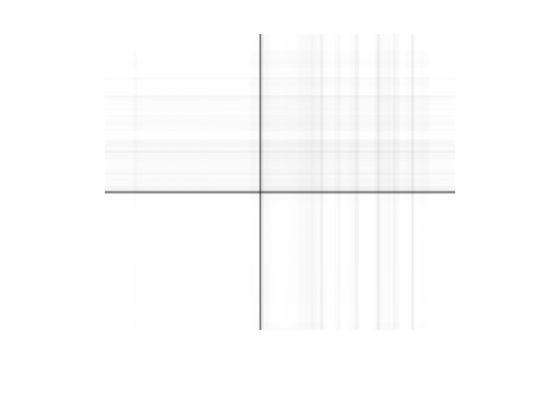

In [121]:
k = 1; % A = U S V^T
W = V';
[m,n] = size(A);
B =  U(:,1:k)*S(1:k,1:k)*W(1:k,:);
B = uint8(B);
imshow(B)
fprintf('Compression ratio = %.5f', (m*k+k+n*k)/(m*n))

This required less then 1% of the storage required to store the full matrix.

Next, we look at the size of the singular values, relative to the top singular value:

In [122]:
diag(S(10:30,10:30))'/S(1,1) % Look at singular values 10 through 30, in relative size


ans =

  Columns 1 through 17

    0.0172    0.0162    0.0157    0.0149    0.0145    0.0143    0.0135    0.0122    0.0116    0.0109    0.0106    0.0099    0.0098    0.0096    0.0091    0.0088    0.0080

  Columns 18 through 21

    0.0078    0.0078    0.0075    0.0074



The 20th singular value is less than 1% of the magnitude of the top singular value.  So, we will chop there and see what image we reconstruct.

Compression ratio = 0.11955

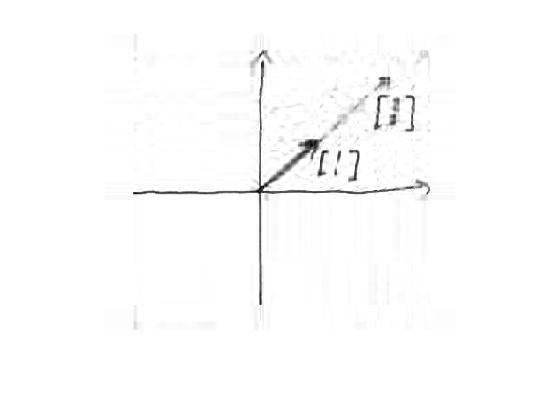

In [123]:
k = 20; % A = U S V^T
W = V';
[m,n] = size(A);
B =  U(:,1:k)*S(1:k,1:k)*W(1:k,:);
B = uint8(B);
imshow(B)
fprintf('Compression ratio = %.5f', (m*k+k+n*k)/(m*n))

With just over 10% of the storage, we can compress the image so that it is at least recognizable.  There are some issues that affect the true amount of storage.  These are related to the fact that the original image was an integer matrix and $U,V,S$ are now double precision numbers.  Whether justified, or not, we ignore that here for simplicity.